## FINAL TASK

In short, your task is to find out all time warmest and coldest months from the data, and create a plot that shows the all-time warmest and coldest mean monthly temperatures from January to December:

![img/monthly_min_max.png](img/monthly_min_max.png)

### Input data

Use one of the data files from lesson 6. If you want, you can of course repeate this process for all the weather stations! 

### Steps

You can design the analysis workflow freely, but in general you will need to include these steps in your analysis:

1. Read in data and parse the dates
2. Convert Fahreheit to Celsius
3. Calculate monthly mean temperatures for each unique month in the data (you can subset the data to a 30 year observation period)
4. Calculate all time maximum and minimum temperatures for each month (January-December) based on the monthly means
5. Plot all time minimum and maximum temperatures in one plot (months on the x-axis, temperature on the y-axis)

Extra: plot an interactive plot (using Bokeh) where you can hover over the values and see which year did the minimum and maximum temperatures occur.

In [1]:
import pandas as pd

# read in data and parse dates
### BEGIN SOLUTION
import pandas as pd

fp = r"C:\LocalData\VUOKKHEI\codes\Geo-Python\data\data\029740.txt"
data = pd.read_csv(fp,
                  delim_whitespace=True,
                  usecols=['USAF','YR--MODAHRMN','TEMP', 'MAX', 'MIN'],
                  na_values=['*', '**', '***', '****', '*****', '******'])
# Convert to datetime
data["DATE"] = pd.to_datetime(data['YR--MODAHRMN'].astype(str), format='%Y%m%d', exact=False)

# Create the dictionary with old and new names
new_names = {'TEMP': 'TEMP_F'}

# Rename the columns
data = data.rename(columns=new_names)

# Calculate celsius temps
data['TEMP_C'] = (data['TEMP_F'] - 32) / (9/5)

# Rename the columns
data = data.rename(columns=new_names)
### END SOLUTION

In [2]:
# Calculate monthly mean temperatures for each unique month (using groupby)
### BEGIN SOLUTION
# group by month
# Long term average for reference period: 1 January 1981–31 December 2010
data = data.loc[(data["DATE"] >="1988") & (data["DATE"] <"2018")]


data["MONTH"] = data["DATE"].dt.month
data["YEAR"] = data["DATE"].dt.year

monthly_mean = data.groupby(["YEAR","MONTH"]).mean()[['USAF', 'TEMP_F', 'MAX', 'MIN', 'TEMP_C']]
print(monthly_mean.head())
### END SOLUTION

               USAF     TEMP_F        MAX        MIN     TEMP_C
YEAR MONTH                                                     
1988 1      29740.0  27.404003  29.677419  24.812500  -2.553332
     2      29740.0  24.830299  26.925926  22.166667  -3.983167
     3      29740.0  26.399381  30.275862  21.724138  -3.111455
     4      29740.0  34.909643  42.000000  27.842105   1.616468
     5      29740.0  53.832024  64.766667  40.900000  12.128902


In [3]:
# Calculate all time maximum and minimum temperatures for each month 
# this can be done e.g. by grouping the monthly mean values by month, and calculating max and mean for each month. You also need to store information about which year the warmest month occurred.

### BEGIN SOLUTION
all_time_max = pd.DataFrame()
all_time_min = pd.DataFrame()

for idx, group in monthly_mean.groupby("MONTH"):
    all_time_max.at[idx, "MAX_TEMP"] = group["TEMP_C"].max()
    all_time_max.at[idx, "MAX_TEMP_ID"] = str(group["TEMP_C"].idxmax())
    
    all_time_min.at[idx, "MIN_TEMP"] = group["TEMP_C"].min()
    all_time_min.at[idx, "MIN_TEMP_ID"] = str(group["TEMP_C"].idxmin())

print(all_time_min)
print(all_time_max)
### END SOLUTION

     MIN_TEMP MIN_TEMP_ID
1  -12.466338   (2010, 1)
2  -12.970810   (1994, 2)
3   -6.712670   (2013, 3)
4    1.616468   (1988, 4)
5    8.059106   (1991, 5)
6   12.229358   (1993, 6)
7   14.748624   (1996, 7)
8   13.580328   (1993, 8)
9    6.569883   (1993, 9)
10   0.559208  (2002, 10)
11  -3.413242  (1998, 11)
12  -8.844074  (2010, 12)
     MAX_TEMP MAX_TEMP_ID
1   -0.248146   (1989, 1)
2    1.235360   (1990, 2)
3    2.941884   (2007, 3)
4    6.377663   (2000, 4)
5   14.036734   (2016, 5)
6   18.553853   (1999, 6)
7   22.373510   (2010, 7)
8   19.391706   (2002, 8)
9   13.668671   (2006, 9)
10   8.871404  (2000, 10)
11   4.733068  (2000, 11)
12   3.189534  (2006, 12)


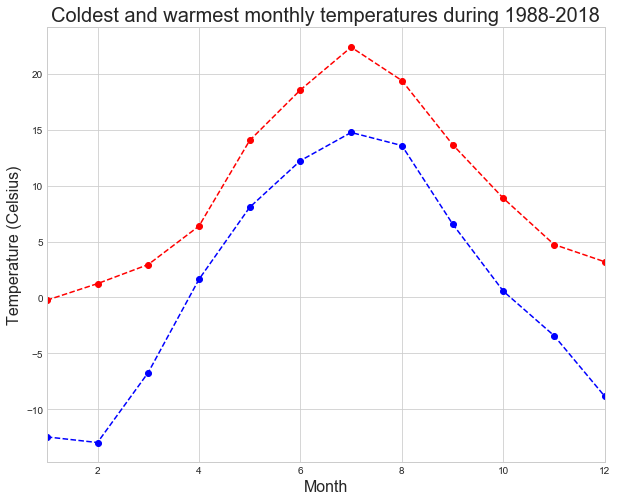

In [10]:
%matplotlib inline
# Plot all time mean and all time max temperatures (one plot with months on the x-axis, and temp on the y-axis)
### BEGIN SOLUTION
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# Create figure with four subplots
fig, ax = plt.subplots(figsize=(10,8))

all_time_max["MAX_TEMP"].plot(ax=ax, style='ro--', c="r")
all_time_min["MIN_TEMP"].plot(ax=ax, style='ro--', c="b")

# Add title and labels
plt.title("Coldest and warmest monthly temperatures during 1988-2018", fontsize=20)
plt.xlabel("Month", fontsize=16)
plt.ylabel("Temperature (Celsius)", fontsize=16)
plt.savefig("img/monthly_min_max.png")

### END SOLUTION

In [5]:
# Extra: Create an interactive Bokeh-plot where you can hover over the values and see which year had the warmest month
### BEGIN SOLUTION

import pandas_bokeh
pandas_bokeh.output_notebook()

#Combine data frames:
min_max = pd.concat([all_time_max, all_time_min], axis=1)

min_max.plot_bokeh(colormap=["red", "blue"], 
                   plot_data_points=True, 
                   xlabel="Month",
                   ylabel="Temperature (C)]",
                  )

### END SOLUTION

Loading BokehJS ...

Figure(id='1002', ...)